# Principal Component Analysis (PCA)

In [183]:
import numpy as np
from numpy import linalg as la
import pandas as pd

from sklearn import datasets
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline

In [174]:
# using seaborn style (type plt.style.available to see available styles)
plt.style.use("seaborn-dark")

### PCA
Let us do the PCA first on a 2D set of data

In [175]:
# Principal Component Analysis
X = np.array([[-2, 3], [1, 5], [2, -4], [3, 9]])
print('X:\n',X)

X:
 [[-2  3]
 [ 1  5]
 [ 2 -4]
 [ 3  9]]


In [176]:
# PCA
pca = PCA(n_components = 2)
# fit on data
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [177]:
# Explained variance and principal components 
print('\nExplained variance:')
print(pca.explained_variance_)
print('\nPrincipal components:')
print(pca.components_)

# Transform 
Xnew = pca.transform(X)
print('\nX transformed:\n',Xnew)


Explained variance:
[29.69432167  4.55567833]

Principal components:
[[-0.06644583 -0.99779003]
 [-0.99779003  0.06644583]]

X transformed:
 [[ 0.44878501  2.97675864]
 [-1.74613256  0.11628021]
 [ 7.16753191 -1.47952232]
 [-5.87018436 -1.61351653]]


Let us note that:

In [178]:
# Covariance of X and the transformed X
print('Cov(X.T):')
print( np.cov(X.T) )

print('\nCov(Xtrasformed.T):')
print( np.cov(Xnew.T) )

Cov(X.T):
[[ 4.66666667  1.66666667]
 [ 1.66666667 29.58333333]]

Cov(Xtrasformed.T):
[[ 2.96943217e+01 -8.88178420e-16]
 [-8.88178420e-16  4.55567833e+00]]


that is, while the original random variables are, of course, correlated, 
we can see that after the PCA trasformation, **the new random variables are uncorrelated** (elements outside the main diagonal (approximately) equal to zero. 

Moreover:

In [179]:
print( Xnew[:,0].mean() )
print( Xnew[:,1].mean() )

0.0
-5.551115123125783e-17


they now also have **zero mean**.

### Understanding the PCA

The **principal components** of our data matrix $X$ are defined as the **eigenvectors of the covariance matrix** of $X$. These are indeed the *pca.components_*. On the other hand, *pca.explained_variance_* returns the associated **eigenvalues of the covariance matrix**.

Therefore, what essentially the PCA does is computing the *eigenpairs* of the covariance matrix of $X$.
 
The *pca.trasform()* function **projects the original data over the new basis of the eigenvectors**. 
Since the eigenvector matrix (i.e., the matrix containing the eigenvectors as columns) is orthogonal, this correspods to the simple matrix muliplication between the eigenvector matrix and the original (scaled) data.   

In [181]:
# First of all, center the columns of X by subtracting column means
Xsc = X - X.mean(axis=0) 
print('X scaled:\n',Xsc)
# columns of Xsc have zero mean

X scaled:
 [[-3.   -0.25]
 [ 0.    1.75]
 [ 1.   -7.25]
 [ 2.    5.75]]


In [184]:
# Compute the eigenpairs of (the transposed of the) covariance matrix of our data
eigval, eigvec = la.eig( np.cov(Xsc.T) )

# Sort the eigenvectors according to the magnitude of the eigenvalues in descending order
idx = eigval.argsort()[::-1]   
eigval = eigval[idx]
eigvec = eigvec[:,idx]

print('Eigenvalues:\n',eigval)
print('\nEigenvectors:\n',eigvec)

Eigenvalues:
 [29.69432167  4.55567833]

Eigenvectors:
 [[-0.06644583 -0.99779003]
 [-0.99779003  0.06644583]]


In [185]:
# Finally project the original scaled data into the space spanned by the eigenvectors
P = (Xsc).dot( eigvec )
print('X transformed:\n',P)

# or, equivalently:
#P = (eigvec.T).dot( Xsc.T )
#print('X transformed:\n',P.T)

X transformed:
 [[ 0.44878501  2.97675864]
 [-1.74613256  0.11628021]
 [ 7.16753191 -1.47952232]
 [-5.87018436 -1.61351653]]


### Note that
the covariance matrix *np.cov(Xsc.T)* corresponds to the matrix given 
by Xsc.T$\cdot$Xsc / ($n$-1), where $n$ is the total number of samples, in our case $4$. 
Verify that the code below gives back the same values$\dots$

In [186]:
#eigval, eigvec = la.eig( Xsc.T.dot(Xsc) / (4-1) )
#idx = eigval.argsort()[::-1]   
#eigval = eigval[idx]
#eigvec = eigvec[:,idx]
#print('Eigenvalues:\n',eigval)
#print('\nEigenvectors:\n',eigvec)

Also, notice that the eigenvectors are normalised, i.e., their $\ell^2$ norm is equal to $1$:

In [187]:
print( la.norm( eigvec[:,0] ) )
print( la.norm( eigvec[:,1] ) )

0.9999999999999999
0.9999999999999999


### Visualize the trasformation
The principal components (i.e., the eigenvectors of the covariance matrix) represent the **principal axes** of our data whereas the **eplained variance values** (the eigenvalues of the covariance matrix) are an indication of how *important* are the axes in describing the distribution of the data, or, in other words, a measure of the 
variance of the data when projected onto the axes. 

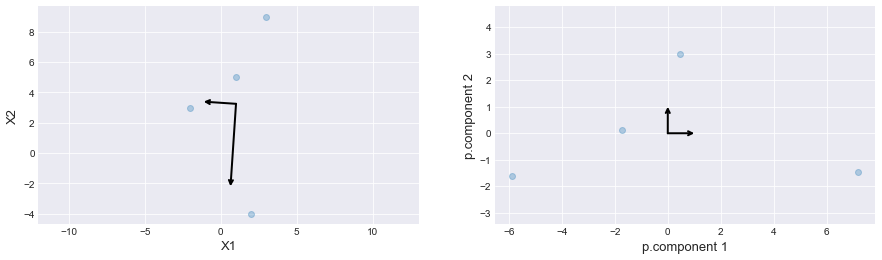

In [188]:
# Plot
fig, ax = plt.subplots(1,2, figsize=(15, 4))
ax = ax.flatten()
arrowprops=dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0)

ax[0].scatter( X[:, 0], X[:, 1] , alpha=0.3)
ax[0].set_xlabel('X1',fontsize=13)
ax[0].set_ylabel('X2',fontsize=13)
ax[0].axis('equal');
ax[0].grid()
w1 = 1 * np.sqrt( pca.explained_variance_[0] ) * pca.components_[:,0]
w2 = 1 * np.sqrt( pca.explained_variance_[1] ) * pca.components_[:,1]
ax[0].annotate('', pca.mean_+ w1, pca.mean_, arrowprops=arrowprops)
ax[0].annotate('', X.mean(axis=0) + w2, X.mean(axis=0), arrowprops=arrowprops)

ax[1].scatter( Xnew[:, 0], Xnew[:, 1] , alpha=0.3)
ax[1].set_xlabel('p.component 1',fontsize=13)
ax[1].set_ylabel('p.component 2',fontsize=13)
ax[1].axis('equal');
ax[1].grid()
ax[1].annotate('', [0,1], [0,0], arrowprops=arrowprops)
ax[1].annotate('', [1,0], [0,0], arrowprops=arrowprops)

plt.show() 

Let us just use more data points and plot again the original data and the transformed ones onto the principal components

In [189]:
# Generate 'nrv' sample of 2 random variables
rgen = np.random.RandomState(25)
nrv = 100
x1 = 10 * rgen.randn(nrv,2) + 2.25
x2 = rgen.rand(2,2)
Y  = x1.dot(x2)

# now scale the data between 0 and 1 using MinMaxScaler
scaler = MinMaxScaler()
Y = scaler.fit_transform( Y )

In [190]:
# Performing PCA
pca = PCA(n_components = 2)
pca.fit(Y)
Ynew = pca.transform(Y)

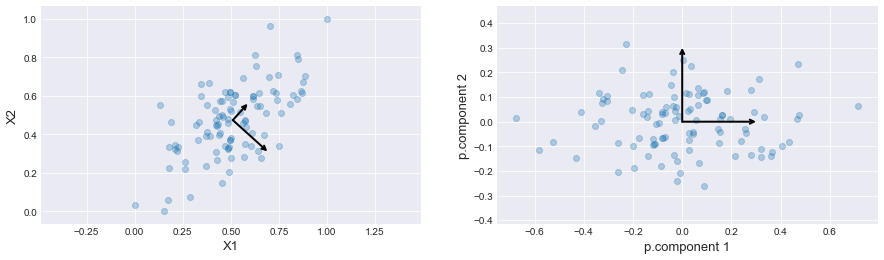

In [191]:
# Plot
fig, ax = plt.subplots(1,2, figsize=(15, 4))
ax = ax.flatten()
arrowprops=dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0)

ax[0].scatter( Y[:, 0], Y[:, 1] , alpha=0.3)
ax[0].set_xlabel('X1',fontsize=13)
ax[0].set_ylabel('X2',fontsize=13)
ax[0].axis('equal');
ax[0].grid()
w1 = 1 * np.sqrt( pca.explained_variance_[0] ) * pca.components_[:,0]
w2 = 1 * np.sqrt( pca.explained_variance_[1] ) * pca.components_[:,1]
ax[0].annotate('', pca.mean_ + w1, pca.mean_, arrowprops=arrowprops)
ax[0].annotate('', pca.mean_ + w2, pca.mean_, arrowprops=arrowprops)

ax[1].scatter( Ynew[:, 0], Ynew[:, 1] , alpha=0.3)
ax[1].set_xlabel('p.component 1',fontsize=13)
ax[1].set_ylabel('p.component 2',fontsize=13)
ax[1].axis('equal');
ax[1].grid()
ax[1].annotate('', [0,0.3], [0,0], arrowprops=arrowprops)
ax[1].annotate('', [0.3,0], [0,0], arrowprops=arrowprops)

plt.show() 

## PCA on digits dataset

In [192]:
# Load digits
digits = datasets.load_digits()

print('There are {} digits picture represented as {}x{} matrices'.format(digits.images.shape[0],
                                                                         digits.images.shape[1],
                                                                         digits.images.shape[2]))
# digit dataframe
digdf = pd.DataFrame(data=digits.data)

# add the target label
digdf['digit'] = digits.target

digdf.head()

There are 1797 digits picture represented as 8x8 matrices


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,digit
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [193]:
# We pass from 64 to 5 dimensions
pca = PCA(n_components = 5)  

# fit digits ( digdf.drop(columns=["digit"]).values == digits.data )
pca.fit( digits.data ) 

# project
projected = pca.transform( digits.data )

print('Dimensions:')
print('* original: ', digits.data.shape)
print('* projected:', projected.shape)

print('\nProjected digits:')
print( projected )

Dimensions:
* original:  (1797, 64)
* projected: (1797, 5)

Projected digits:
[[ -1.25946637  21.27488352  -9.46305479  13.01418335  -7.12883115]
 [  7.9576113  -20.76869895   4.439506   -14.89366244   5.8962119 ]
 [  6.99192289  -9.95598644   2.95855828 -12.28829877 -18.12598182]
 ...
 [ 10.80128375  -6.96025221   5.59955431  -7.22773541  -3.45971515]
 [ -4.87209992  12.4239537  -10.17086678  -6.66886052   3.56900002]
 [ -0.34438962   6.3655492   10.77370845  -7.72621444  -3.31061782]]


In [194]:
print('Explained variance:\n',pca.explained_variance_)

Explained variance:
 [179.0069301  163.71774688 141.78843909 101.1003752   69.51316556]


Plot of the new transformed data

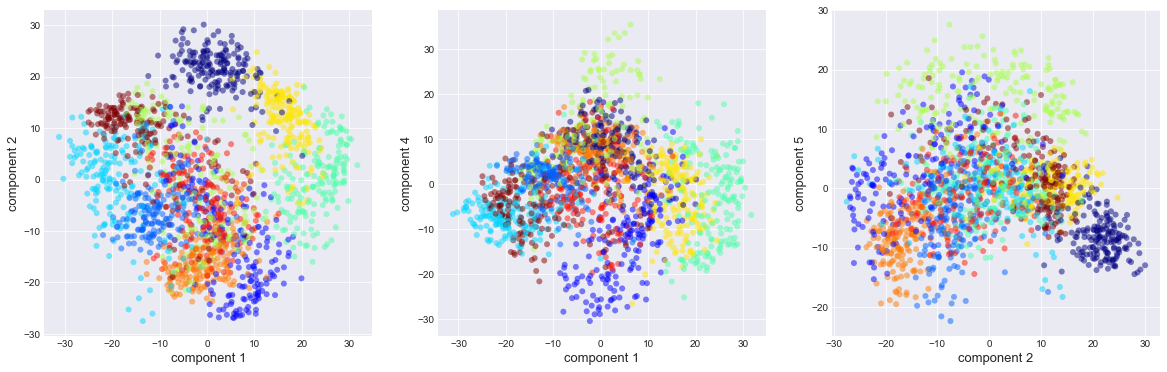

In [195]:
fig, ax = plt.subplots(1,3, figsize=(20, 6))
ax = ax.flatten()

ax[0].scatter(projected[:,0], projected[:,1], c=digdf["digit"], edgecolor='none', alpha=0.5, cmap='jet')
ax[0].set_xlabel('component 1',fontsize=13)
ax[0].set_ylabel('component 2',fontsize=13)
ax[0].grid()

ax[1].scatter(projected[:,0], projected[:,3], c=digdf["digit"], edgecolor='none', alpha=0.5, cmap='jet')
ax[1].set_xlabel('component 1',fontsize=13)
ax[1].set_ylabel('component 4',fontsize=13)
ax[1].grid()

ax[2].scatter(projected[:,1], projected[:,4], c=digdf["digit"], edgecolor='none', alpha=0.5, cmap='jet')
ax[2].set_xlabel('component 2',fontsize=13)
ax[2].set_ylabel('component 5',fontsize=13)
ax[2].grid()

### Number of components to choose

Let us first run the PCA with all possible componets, i.e., $64$ in the case of digits

In [196]:
pca = PCA(n_components=64)
pca.fit(digits.data)

PCA(copy=True, iterated_power='auto', n_components=64, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Now, plot the cumulative **explained variance ratio**

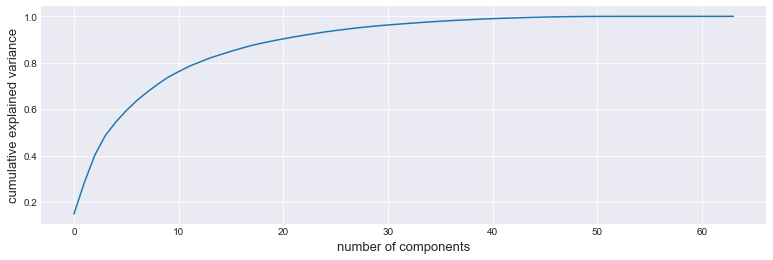

In [197]:
fig, ax = plt.subplots(1,1, figsize=(13, 4))
ax.plot( np.cumsum( pca.explained_variance_ratio_) )
ax.set_xlabel('number of components', fontsize=13)
ax.set_ylabel('cumulative explained variance', fontsize=13)
ax.grid()

That is, for example, in order to retain about the **90%** of the variance of our digit data, we should choose about **20** components.

Let us verify this by calling the PCA using 0.9 as a threshold:

In [198]:
pca = PCA(0.90)
pca.fit(digits.data)

print('Components used:',pca.n_components_)

Components used: 21


## Train a Naive Bayes classifier and see if PCA helps 

In [199]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import cross_val_score

### Cross-validation score on original data (no scaling nor PCA)

In [200]:
print('GAUSSIAN NB')
print('* mean score: ', cross_val_score(GaussianNB(), digits.data, digits.target, cv = 10).mean())
print('MULTINOMIAL NB')
print('* mean score: ', cross_val_score(MultinomialNB(), digits.data, digits.target, cv = 10).mean())

GAUSSIAN NB
* mean score:  0.8103537583567821
MULTINOMIAL NB
* mean score:  0.8819396216300838


### Cross-validation score on scaled data (no PCA)

In [201]:
scaler = MinMaxScaler()
digitsdata_mm = scaler.fit_transform(digits.data)

In [202]:
print('GAUSSIAN NB')
print('* mean score: ', cross_val_score(GaussianNB(), digitsdata_mm, digits.target, cv = 10).mean())
print('MULTINOMIAL NB')
print('* mean score: ', cross_val_score(MultinomialNB(), digitsdata_mm, digits.target, cv = 10).mean())

GAUSSIAN NB
* mean score:  0.7925122855632725
MULTINOMIAL NB
* mean score:  0.8797355598963097


The mean scores deteriorate. 
Eventually, this can make sense since Naive Bayes should is not affected by values of the data.

### Cross-validation score on original data pre-processed with PCA 

In [203]:
# PCA with all components 
pca = PCA(n_components=64)
pca.fit(digits.data)
digitsdata_pca = pca.transform(digits.data)

print('GAUSSIAN NB AFTER PCA')
print('* mean score: ', cross_val_score(GaussianNB(), digitsdata_pca, digits.target, cv = 10).mean() )

# To use multinomal NB, data have to be positive, hence we shift data by adding the abs of the minimum
print('MULTINOMIAL NB AFTER PCA')
print('* mean score: ', cross_val_score(MultinomialNB(), digitsdata_pca + abs( np.min(digitsdata_pca) ) , digits.target, cv = 10).mean() )

GAUSSIAN NB AFTER PCA
* mean score:  0.8457344623268735
MULTINOMIAL NB AFTER PCA
* mean score:  0.8859062299511933


Gaussian NB improved$\dots$

### Cross-validation score on scaled data pre-processed with PCA 

In [204]:
pca = PCA(n_components=64)
pca.fit(digitsdata_mm)
digitsdata_mm_pca = pca.transform(digitsdata_mm)

print('GAUSSIAN NB AFTER PCA')
print('* mean score: ', cross_val_score(GaussianNB(), digitsdata_mm_pca, digits.target, cv = 10).mean() )

# To use multinomal NB, data have to be positive, hence we shift data by adding the abs of the minimum
print('MULTINOMIAL NB AFTER PCA')
print('* mean score: ', cross_val_score(MultinomialNB(), digitsdata_mm_pca + abs(np.min(digitsdata_mm_pca)), 
                                  digits.target, cv = 10).mean() )

GAUSSIAN NB AFTER PCA
* mean score:  0.8542223285607495
MULTINOMIAL NB AFTER PCA
* mean score:  0.8825906184030516


Again, as expected, scaling data should not change so much the results

### Perform the PCA over a training set
Now, we first split the dataset into train and test set and scale the data

In [205]:
# Train test split (default test_size=0.25)
X_train, X_test, y_train, y_test = train_test_split( digits.data, 
                                                     digits.target, 
                                                     random_state=0 ) 
# Scaling data 
scaler = MinMaxScaler()
X_train_mm = scaler.fit_transform(X_train)
X_test_mm  = scaler.fit_transform(X_test)

print(X_train.shape)
print(X_test.shape)

(1347, 64)
(450, 64)


Now we perform the PCA **only on the train set**; hence we project both the train and the test set onto the principal component 

In [206]:
pca = PCA(n_components=20)

# fit only the train set 
pca.fit(X_train_mm)

# now project both the train and the test set
X_train_mm_pca = pca.transform(X_train_mm)
X_test_mm_pca  = pca.transform(X_test_mm)

In [207]:
# Instantiate naive bayes classifiers
gnb = GaussianNB()
mnb = MultinomialNB()

print('GAUSSIAN NB AFTER PCA')
y_pred = gnb.fit(X_train_mm_pca, y_train).predict(X_test_mm_pca)
score = 1 - (len( np.where( np.diff( np.c_[y_test, y_pred] , 1) )[0] ) / X_test_mm_pca.shape[0] )
print('Score: ', score) 

print('MULTINOMIAL NB AFTER PCA')
X_train_mm_pca_shf = X_train_mm_pca + abs(np.min(X_train_mm_pca))
X_test_mm_pca_shf  = X_test_mm_pca  + abs(np.min(X_test_mm_pca))
y_pred = mnb.fit(X_train_mm_pca_shf, y_train).predict(X_test_mm_pca_shf)
score = 1 - (len( np.where( np.diff( np.c_[y_test, y_pred] , 1) )[0] ) / X_test_mm_pca.shape[0] )
print('Score: ', score) 

GAUSSIAN NB AFTER PCA
Score:  0.9333333333333333
MULTINOMIAL NB AFTER PCA
Score:  0.8911111111111111


Now, both scores are larger! It may be reasonable to perform the PCA (with a certain number of components) 
only on the train set, and then make the projections$\dots$

Let us see the scores when changing the number of principal components

In [208]:
def pcascores(X_train_mm, X_test_mm, ncomp):
    pca = PCA(n_components=ncomp)
    pca.fit(X_train_mm)

    X_train_mm_pca = pca.transform(X_train_mm)
    X_test_mm_pca  = pca.transform(X_test_mm)

    gnb = GaussianNB()
    mnb = MultinomialNB()
    
    y_pred = gnb.fit(X_train_mm_pca, y_train).predict(X_test_mm_pca)
    gausscore = 1 - (len( np.where( np.diff( np.c_[y_test, y_pred] , 1) )[0] ) / X_test_mm_pca.shape[0] ) 

    X_train_mm_pca_shf = X_train_mm_pca + abs(np.min(X_train_mm_pca))
    X_test_mm_pca_shf  = X_test_mm_pca  + abs(np.min(X_test_mm_pca))
    y_pred = mnb.fit(X_train_mm_pca_shf, y_train).predict(X_test_mm_pca_shf)
    multiscore = 1 - (len( np.where( np.diff( np.c_[y_test, y_pred] , 1) )[0] ) / X_test_mm_pca.shape[0] ) 
    
    return gausscore, multiscore
#end function

In [209]:
gnbscore = []
mnbscore = []
for ncomp in range(2,64,2):
    gnbsc, mnbsc = pcascores(X_train_mm, X_test_mm, ncomp)   
    gnbscore.append(gnbsc)
    mnbscore.append(mnbsc)
#endfor

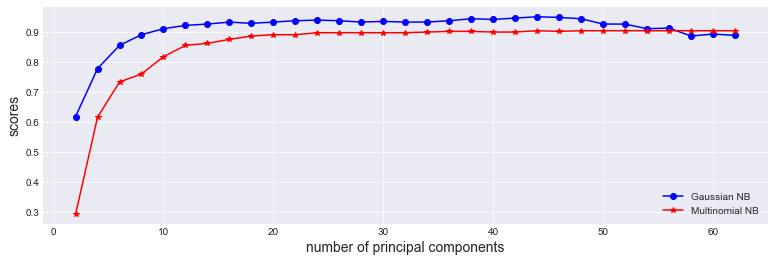

In [210]:
fig, ax = plt.subplots(1,1, figsize=(13, 4))
ax.plot(range(2,64,2), gnbscore, 'b-o', label="Gaussian NB")
ax.plot(range(2,64,2), mnbscore, 'r-*', label="Multinomial NB")
ax.set_xlabel('number of principal components',fontsize=14) 
ax.set_ylabel('scores',fontsize=14) 
ax.grid()
ax.legend()
plt.show()

We see that after about 20 components the scores are stable, since we saw that with this number of components about the 90% of the variance of the data was retained. However, Gaussian NB classifier starts to deteriorate after about 50 components$\dots$